In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! ls

drive  sample_data


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import PIL
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator

In [4]:
ROOTPATH = '/content/drive/MyDrive'
DATAPATH = ROOTPATH+'/Thesis/training_set'
TRAINPATH = ROOTPATH+'/Thesis/training_set'
TESTPATH = ROOTPATH+'/Thesis/testing_set'
MODEL_PATH = ROOTPATH+'/Thesis/model'

In [5]:
two=glob.glob(DATAPATH+'/1.two/*.*')
five=glob.glob(DATAPATH+'/2.five/*.*')
ten=glob.glob(DATAPATH+'/3.ten/*.*')
twenty=glob.glob(DATAPATH+'/4.twenty/*.*')
fifty=glob.glob(DATAPATH+'/5.fifty/*.*')
one_hundred=glob.glob(DATAPATH+'/6.one_hundred/*.*')
two_hundred=glob.glob(DATAPATH+'/7.two_hundred/*.*')
five_hundred=glob.glob(DATAPATH+'/8.five_hundred/*.*')
one_thousand=glob.glob(DATAPATH+'/9.one_thousand/*.*')

In [6]:
print('two: ',len(two))
print('five : ',len(five))
print('ten: ',len(ten))
print('twenty: ',len(twenty))
print('fifty: ',len(fifty))
print('one_hundred: ',len(one_hundred))
print('two_hundred: ',len(two_hundred))
print('five_hundred: ',len(five_hundred))
print('one_thousand: ',len(one_thousand))

two:  600
five :  600
ten:  600
twenty:  600
fifty:  600
one_hundred:  600
two_hundred:  600
five_hundred:  600
one_thousand:  600


In [7]:
dataset_classes=[two,five,ten,twenty,fifty,one_hundred,two_hundred,five_hundred,one_thousand]
total_class=len(dataset_classes)
print('Total dataset class: ',total_class)

Total dataset class:  9


In [8]:
IMAGE_SIZE=224
BATCH_SIZE=16

#pre_processing_training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=0.2)

training_set = train_datagen.flow_from_directory(
        DATAPATH,
        shuffle=True,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training')


validation_set = train_datagen.flow_from_directory(
        DATAPATH,
         shuffle=True,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation')


Found 4320 images belonging to 9 classes.
Found 1080 images belonging to 9 classes.


In [9]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        TESTPATH,
         shuffle=False,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical')

Found 575 images belonging to 9 classes.


In [10]:
training_set.class_indices

{'1.two': 0,
 '2.five': 1,
 '3.ten': 2,
 '4.twenty': 3,
 '5.fifty': 4,
 '6.one_hundred': 5,
 '7.two_hundred': 6,
 '8.five_hundred': 7,
 '9.one_thousand': 8}

In [11]:
total_class=len(training_set.class_indices)
print('Number of classes in dataset: ',total_class)

Number of classes in dataset:  9


In [13]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=64 , kernel_size=3 , strides=2, activation='relu' , input_shape=[224,224,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32 , kernel_size=3 , strides=2, activation='relu' ))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2 , strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32 , kernel_size=3 , strides=2, activation='relu' ))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Dropout(0.5))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=9 , activation='softmax'))

In [14]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 111, 111, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 27, 27, 32)        18464     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 6, 6, 32)          9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 32)        

In [15]:
cnn.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath=MODEL_PATH+'first1model.model.best.hdf5', verbose=1 ,save_best_only=True)

In [18]:
history=cnn.fit(training_set,
                epochs=100,
                validation_data=validation_set,
                callbacks=[checkpointer])

Epoch 1/100
270/270 [==============================] - ETA: 0s - loss: 1.7478 - accuracy: 0.3002
Epoch 1: val_loss improved from inf to 1.20316, saving model to /content/drive/MyDrive/Thesis/modelfirst1model.model.best.hdf5
270/270 [==============================] - 1340s 5s/step - loss: 1.7478 - accuracy: 0.3002 - val_loss: 1.2032 - val_accuracy: 0.5065
Epoch 2/100
270/270 [==============================] - ETA: 0s - loss: 0.9800 - accuracy: 0.6238
Epoch 2: val_loss improved from 1.20316 to 0.86693, saving model to /content/drive/MyDrive/Thesis/modelfirst1model.model.best.hdf5
270/270 [==============================] - 80s 295ms/step - loss: 0.9800 - accuracy: 0.6238 - val_loss: 0.8669 - val_accuracy: 0.7102
Epoch 3/100
270/270 [==============================] - ETA: 0s - loss: 0.6704 - accuracy: 0.7563
Epoch 3: val_loss improved from 0.86693 to 0.76567, saving model to /content/drive/MyDrive/Thesis/modelfirst1model.model.best.hdf5
270/270 [==============================] - 81s 302ms/

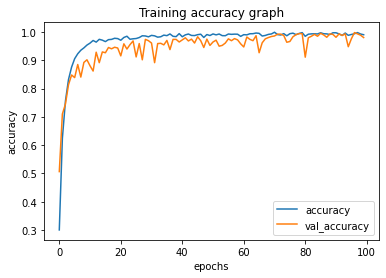

In [19]:
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training accuracy graph')
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

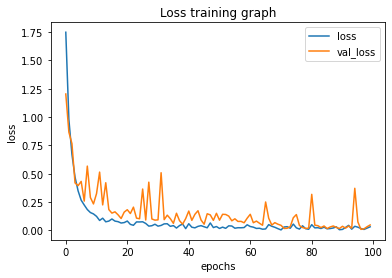

In [20]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss training graph')
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [21]:
test_loss,test_accuracy=cnn.evaluate(test_set)
print('Test Loss: ',test_loss)
print('Test Accuracy: ',test_accuracy)

36/36 [==============================] - 147s 4s/step - loss: 0.0258 - accuracy: 0.9843
Test Loss:  0.025819428265094757
Test Accuracy:  0.9843478202819824


In [22]:
print('Accuracy of the model is : ',test_accuracy*100)

Accuracy of the model is :  98.43478202819824


In [23]:
from tensorflow.keras.preprocessing import image

In [24]:
predicted_result=cnn.predict(test_set)
predicted_result[:5]

array([[1.0000000e+00, 2.5585517e-12, 9.3412648e-19, 3.4595780e-14,
        9.9848263e-24, 1.8267036e-10, 2.4291804e-08, 4.3220632e-09,
        4.1969748e-12],
       [9.9999988e-01, 4.8415834e-11, 3.4600456e-18, 5.4000515e-12,
        3.6737061e-22, 1.4470747e-09, 5.1381917e-08, 6.0066050e-08,
        5.4678682e-11],
       [9.9999988e-01, 5.6775987e-11, 4.9907975e-18, 6.7291047e-12,
        5.8981078e-22, 1.4881000e-09, 5.0180457e-08, 7.2199242e-08,
        5.3374367e-11],
       [9.9999988e-01, 5.1788188e-11, 4.8779763e-18, 5.5795069e-12,
        5.3154836e-22, 1.2935250e-09, 5.1514689e-08, 5.8065083e-08,
        4.6109099e-11],
       [9.9999940e-01, 1.3317144e-09, 3.3774326e-13, 1.0754726e-09,
        6.6824611e-14, 1.8600993e-07, 3.9282133e-07, 6.6369504e-10,
        9.7346353e-10]], dtype=float32)

In [25]:
predicted_class=np.argmax(predicted_result,axis=-1)
predicted_class[:5]

array([0, 0, 0, 0, 0])

In [26]:
test_classes=test_set.classes
test_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [27]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_classes,predicted_class)
print(cm)

[[72  0  0  0  0  0  0  0  0]
 [ 0 60  0  0  0  0  0  0  0]
 [ 0  0 60  0  0  0  0  0  0]
 [ 0  0  0 51  0  0  0  9  0]
 [ 0  0  0  0 60  0  0  0  0]
 [ 0  0  0  0  0 72  0  0  0]
 [ 0  0  0  0  0  0 47  0  0]
 [ 0  0  0  0  0  0  0 72  0]
 [ 0  0  0  0  0  0  0  0 72]]


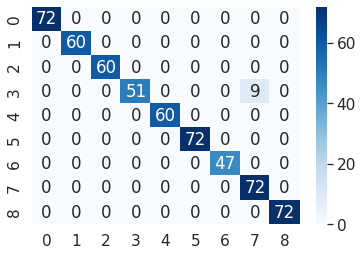

In [28]:
import seaborn as sns
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True,fmt='d',cmap="Blues")

In [29]:
from sklearn.metrics import accuracy_score
print('Accuracy score: ',accuracy_score(test_classes,predicted_class))

Accuracy score:  0.9843478260869565


In [30]:
from sklearn.metrics import classification_report
print('Classification Report \n',classification_report(test_classes,predicted_class))

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        60
           2       1.00      1.00      1.00        60
           3       1.00      0.85      0.92        60
           4       1.00      1.00      1.00        60
           5       1.00      1.00      1.00        72
           6       1.00      1.00      1.00        47
           7       0.89      1.00      0.94        72
           8       1.00      1.00      1.00        72

    accuracy                           0.98       575
   macro avg       0.99      0.98      0.98       575
weighted avg       0.99      0.98      0.98       575



In [36]:
export_path_keras = "/content/drive/MyDrive/Model/1.finalModel_1_CNN.h5"
print(export_path_keras)
cnn.save(export_path_keras)

/content/drive/MyDrive/Model/1.finalModel_1_CNN.h5


In [32]:
from tensorflow.keras.models import load_model

In [33]:
model_path=export_path_keras
reload_model=load_model(model_path)
reload_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 111, 111, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 27, 27, 32)        18464     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 6, 6, 32)          9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 32)        

In [34]:
print(len(reload_model.weights))
print(reload_model.output_shape)

10
(None, 9)


In [35]:
reload_model.layers

In [1]:
import os
import pyttsx3 
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import time
import PIL
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from playsound import playsound
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [3]:
export_path_keras = "Final Thesis/Saved Model/1.finalModel_1_CNN.h5"
model_path=export_path_keras
reload_model=load_model(model_path)
reload_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 111, 111, 64)      1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 27, 27, 32)        18464     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 3, 3, 32)         

In [4]:
def noteclass(cls):
    txt=pyttsx3.init()
    if cls==0:
        ans="Two Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==1:
        ans="Five Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==2:
        ans="Ten Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==3:
        ans="Twenty Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==4:
        ans="Fifty Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==5:
        ans="One Hundred Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==6:
        ans="Two Hundred Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==7:
        ans="Five Hundred Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    else:
        ans="One Thousand Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    

In [6]:

def _voice(cls):
    try:
        if cls==0:
            ans="Two Taka"
            print(ans)
            playsound('E:/AThesis/Final/Audio/2.mp3')      
        elif cls==1:
            ans="Five Taka"
            print(ans)
            playsound('E:/AThesis/Final/Audio/5.mp3')
        elif cls==2:
            ans="Ten Taka"
            print(ans)
            playsound('E:/AThesis/Final/Audio/10.mp3')
        elif cls==3:
            ans="Twenty Taka"
            print(ans)
            playsound('E:/AThesis/Final/Audio/20.mp3')
        elif cls==4:
            ans="Fifty Taka"
            print(ans)
            playsound('E:/AThesis/Final/Audio/50.mp3')
        elif cls==5:
            ans="One Hundred Taka"
            print(ans)
            playsound('E:/AThesis/Final/Audio/100.mp3')
        elif cls==6:
            ans="Two Hundred Taka"
            print(ans)
            playsound('E:/AThesis/Final/Audio/200.mp3')
        elif cls==7:
            ans="Five Hundred Taka"
            print(ans)
            playsound('E:/AThesis/Final/Audio/500.mp3')
        else:
            ans="One Thousand Taka"
            print(ans)
            playsound('E:/AThesis/Final/Audio/1000.mp3')
  
    except:
      print("An exception occurred")
    
    

Five Hundred Taka


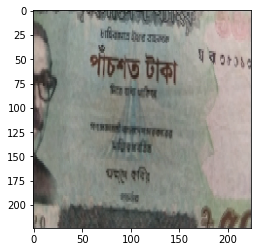

In [5]:
#""WIN_20220326_11_18_21_Pro"""
random_image=image.load_img('E:/AThesis/Final/testing_set/8.five_hundred/five_hundred31.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
#print(test_image.shape)
predicted_class=reload_model.predict(test_image)
#print(predicted_class)
#print('True classification')
noteclass(np.argmax(predicted_class))

Ten Taka


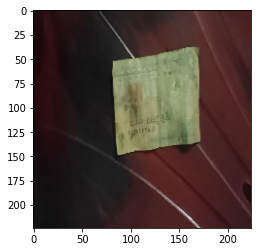

In [10]:
#""E:\AThesis\anotation\anotated img\2\21493.png"""
random_image=image.load_img('E:/AThesis/anotation/anotated img/2/21493.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
#print(test_image.shape)
predicted_class=reload_model.predict(test_image)
#print(predicted_class)
#print('True classification')
noteclass(np.argmax(predicted_class))


(1, 224, 224, 3)
[[1.0000000e+00 2.5585419e-12 9.3410860e-19 3.4595448e-14 9.9846361e-24
  1.8266931e-10 2.4291758e-08 4.3220223e-09 4.1969427e-12]]
Two Taka


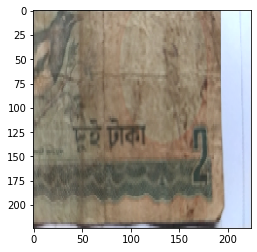

In [12]:
random_image=image.load_img('E:/AThesis/Final/testing_set/1.two/two1.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=reload_model.predict(test_image)
print(predicted_class)
#print('True classification')
noteclass(np.argmax(predicted_class))

(1, 224, 224, 3)
Twenty Taka


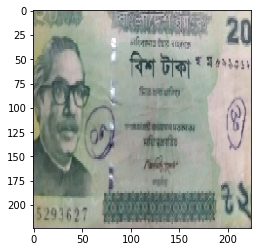

In [13]:
i

Ten Taka


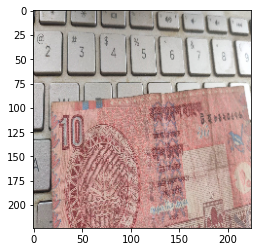

In [8]:
#""WIN_20220326_11_18_21_Pro"""
random_image=image.load_img('C:/Users/Niloy/Pictures/Camera Roll/WIN_20220403_13_06_05_Pro.jpg',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
#print(test_image.shape)
predicted_class=reload_model.predict(test_image)
#print(predicted_class)
#print('True classification')
noteclass(np.argmax(predicted_class))